In [2]:
import numpy as np
import argparse
import time
from fenics import *
import torch

0.05 0.3
n: 20


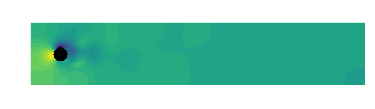

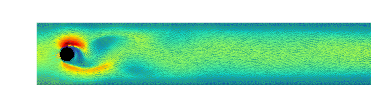

In [3]:
from CFD_data import MyGeometry, MyFunctionSpace, MySolver   
import numpy as np
from fenics import set_log_level, plot
from fenics import *
geometry = MyGeometry(max_x = 2.2, max_y = 0.41, r = 0.05, center=(0.2, 0.2))
function_space = MyFunctionSpace(geometry, )
solver = MySolver(geometry, function_space, params={'dtr': 0.015,'dt' : 0.1,
                            'T': 2,'U_max':1.5,'r' : 0.05,
                            'rho_0': 1,
                            'mu' : 1/1000,
                            'traj_max_T': 20,
                            'dimx': 100,
                            'dimy': 100,
                            'min_w': -1,
                            'max_w': 1,
                            'min_velocity': -1,
                            'max_velocity': 1,
                            })



geometry.generate()

solver.function_space.generate()
set_log_level(30)
solver.fixed_boundary_conditions()
solver.changeable_boundary_conditions(ang_vel=0.3000, )
solver.generate_bc()
solver.generate_sol_var()
solver.generate_solver()

solver.init_solve()
solver.solve_start()
solver.solve_step1()
#solver.solve_step2()

#solver.simulation(geometry.bndry)

#list_D = solver.list_D
#list_L = solver.list_L 
p = solver.sol.split()[1]
plot(p, title='p')
import matplotlib.pyplot as plt
plt.show()
# print([solver.sol(*x) for x in [(0,0), (0,0.1), (0.1,0), (0.1,0.1)] ])

# for i in range(20):
#     solver.solve()

#     plot(solver.sol.split()[0], title='u')


p = solver.sol.split()[1]
u = solver.sol.split()[0]
plot(p, title='p')
plt.style.use('classic')
plot(u, title='u')
plt.style.use('classic')

data_v1,data_v2,data_p = solver.datav1,solver.datav2,solver.datap


In [20]:
print(data_v1.shape)
print(data_v2.shape)
print(data_p.shape)

data_v1 = torch.Tensor(data_v1.squeeze()).unsqueeze(-1)
data_v2 = torch.Tensor(data_v2.squeeze()).unsqueeze(-1)
data_p = torch.Tensor(data_p.squeeze()).unsqueeze(-1)

data = torch.cat((data_v1, data_v2, data_p), dim=-1)
print(data.shape)

torch.Size([20, 64, 128, 1])
torch.Size([20, 64, 128, 1])
torch.Size([20, 64, 128, 1])
torch.Size([20, 64, 128, 3])
